# Importing Data & Packages

In [1]:
# General purpose libraries
import random
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import datetime

# Deep learning library
import keras 
from keras import layers

from sklearn.metrics import confusion_matrix
from sklearn import metrics 
from imblearn.over_sampling import SMOTE
import eli5
from eli5.sklearn import PermutationImportance

import shap

print('Everything Imported Succesfully!')

Everything Imported Succesfully!


## importing tha data from a csv file
import with date parsed and indexes set. fix the name of the data time column and fill NaN in batch names with 'no batch specified'

In [2]:
data=pd.read_csv('/kaggle/input/301-330-days/Data_5IAL_3_301.csv',index_col=0,parse_dates=[1])  # Read data
data.rename(columns={'0':'Date'},inplace=True)                                                  # Give date column a descriptive name
data['5IAL_3_301.BatchName']=data['5IAL_3_301.BatchName'].fillna('No Batch Specified')          # Replace batchnames NaN's with 'no batch'
data.head()

Columns (14) have mixed types.Specify dtype option on import or set low_memory=False.


,Date,5IAL_3_TT301.50,5IAL_3_QIT301.52,5IAL_3_PIT 301.55,5IAL_3_QIT301.57,5IAL_3_PIT301.60,5IAL_3_FIT301.61MF,5IAL_3_FIT301.61VF,5IAL_3_FIT301.61D,5IAL_3_PIT301.63,...,5IAL_3_GSC301.44,5IAL_3_GSO301.44,5IAL_3_LSL301.64,5IAL_3_LSL301.68,5IAL_3_LSLL301.69,5IAL_3_301.OCCUPIED,5IAL_3_LIT301.54,5IAL_3_LSH301.56,5IAL_3_XPV301.13,5IAL_3_WY301.54
0,2022-04-10 12:00:00,21.80,9.84,-0.02,0.0,0.0,0.0,0.0,0.00105,2.07,...,0,0,0,0,0,0,1.40,0,0.0,0.0
1,2022-04-10 12:01:00,21.80,9.84,-0.02,0.0,0.0,0.0,0.0,0.00106,2.07,...,0,0,0,0,0,0,1.40,0,0.0,0.0
2,2022-04-10 12:02:00,21.80,9.84,-0.02,0.0,0.0,0.0,0.0,0.00102,2.07,...,0,0,0,0,0,0,1.41,0,0.0,0.0
3,2022-04-10 12:03:00,21.78,9.84,-0.02,0.0,0.0,0.0,0.0,0.00105,2.07,...,0,0,0,0,0,0,1.40,0,0.0,0.0
4,2022-04-10 12:04:00,21.78,9.84,-0.02,0.0,0.0,0.0,0.0,0.00104,2.07,...,0,0,0,0,0,0,1.40,0,0.0,0.0


### Batchcode date checker

In [3]:
pd_data=(data['5IAL_3_301.BatchName']=='IU7012228605')

#print(np.sum(pd_data))
#print(pd_data[pd_data].index[0])

print(data['Date'][pd_data[pd_data].index[0]])

2022-10-13 14:47:00


In [4]:
batch_IU=data.loc[data['5IAL_3_301.BatchName'].str.contains("IU", case=False)]
print(batch_IU['5IAL_3_301.BatchName'].unique())

['IU7012218701' 'Na IU7012218701' 'Na IU7012218701 CIP'
 'Na IU7012218701 Demi' 'IU7012218702' 'Na IU7012218702' 'IU7012225501'
 'IU7012225502' 'IU7012225503' 'IU7012225503-1' 'IU7012225504'
 'IU7012225505' 'Na IU7012225501' 'IU7012225601' 'IU7012225602'
 'IU702225603' 'IU702225604' 'IU701222605' 'IU7012225606' 'IU7012225701'
 'IU7012225702' 'IU7012225703' 'IU7012225704' 'IU7012225705'
 'IU7012225706' 'IU7012225707' 'IU7012225708' 'IU7012225709'
 'IU7012225710' 'IU7012225711' 'IU7012225712' 'IU7012225713'
 'IU7012225801' 'IU7012225802' 'IU7012225803' 'IU7012225804'
 'IU7012225805' 'IU7012225806' 'IU7012225807' 'IU7012225808'
 'IU7012225809' 'IU7012225810' 'IU7012225811' 'IU7012225812'
 'IU7012225813-1' 'IU7012225814' 'IU7012225815' 'IU7012225901'
 'Na IU7012225901' 'IU7012228401' 'IU7012228402' 'IU7012228403'
 'IU7012228404' 'IU7012228405' 'IU7012228501' 'IU7012228502'
 'IU7012228503' 'NA IU7012228503' 'IU7012228504' 'IU7012228505'
 'IU7012228506' 'IU7012228507' 'IU7012228508' 'IU70122

# Data Splitting and Grouping 

In [5]:
#give unique batch names
Batch_Names=data['5IAL_3_301.BatchName']
unique_names=Batch_Names.unique()
print(unique_names)

['No Batch Specified' 'YP5812210101' 'YP5812210102' ... 'KB212306501'
 'NA KB212306501' 'KC112306501']


In [6]:
print(unique_names.size)

1629


## Filter out the batches
In this step everything that is not a viable batch is filterd out.\
This way demi cleanings, CIP cleanings and downtime are no longer in the dataset.

In [7]:
#Convert the unique_names numpy array to a pandas series
temp_df=pd.Series(unique_names)


submask_IU=temp_df.str.contains("CGD", case=False) | temp_df.str.contains("IU", case=False)

submask_length=((temp_df.str.len() >= 11) & (temp_df.str.len() <= 12))

# Create a boolean mask to select rows where the length of the specified column is between 11 and 12 characters (inclusive)
mask = ~submask_IU & submask_length

# Use the boolean mask to select only the rows that meet the criteria
Viable_Batches = unique_names[mask]

print(Viable_Batches.size)

del temp_df

1119


In [8]:
print(Viable_Batches)

['YP5812210101' 'YP5812210102' 'CD112210101' ... 'KB212306202'
 'KB212306501' 'KC112306501']


In [9]:
print(np.sum(submask_IU))

98


## Train Test Split

Randomly pick the Test_Train_split fraction of data from the filterd unique name list.\
This way a percentage of batches are not used in training and thus can be used for testing.

In [10]:
To_split=Viable_Batches
Test_Train_split=0.2

Test_Batches=random.sample(To_split.tolist(), round(To_split.size*Test_Train_split))

Train_Batches = [x for x in To_split if x not in Test_Batches]

print(len(Test_Batches))
print(len(Train_Batches))

# Use 'isin' to only select datapoint that have a batch name that was selected by the Test_Train split
Train_Data=data[data['5IAL_3_301.BatchName'].isin(Train_Batches)]
Test_Data=data[data['5IAL_3_301.BatchName'].isin(Test_Batches)]

224
895


## Normalise the selection with use of the Z-Score
The Z-score can be described as:\
$Z=\frac{x-\mu}{\sigma}$

In this x is your value, μ is the average of the population that value is taken from, and σ is the standard deviation of the population. It is basicaly a measure of how far a given value is away from its mean in standard deviations. To give you a good feeling, in a normal distribution 66% of values are within 1 std of the mean. 99% are withing 2 std and 99.9 is within 3

Note that the data does not represent a normal curve or bell curve at all. This is solely done to make sure the Neural network gives every value an equeal weigth.\

Also drop everything that turns into NaN's when normalizing

In [11]:
names=Train_Data['5IAL_3_301.BatchName']

col_2_drop=['Date','5IAL_3_301.BatchName','5IAL_3_LSH301.56','5IAL_3_XPV301.05','5IAL_3_XPV301.06','5IAL_3_XPV301.08','5IAL_3_XPV301.09','5IAL_3_XPV301.22','5IAL_3_XPV301.36','5IAL_3_XPV301.42','5IAL_3_XPV301.43','5IAL_3_XPV301.46','5IAL_3_LSL301.64','5IAL_3_XPV301.35']
df=Train_Data.drop(col_2_drop,axis=1)

data_norm=(df-df.mean())/df.std()

data_norm=pd.concat([data_norm,names],axis=1)

# Will need these values to normalise Test data in the same way as Train data
data_norm_values=pd.DataFrame()
for col in df:
    data_norm_values[col]=[np.mean(df[col]),np.std(df[col])]

data_norm_values=data_norm_values.rename(index={0:'mean', 1:'std'})
#data_norm.head()
#data_norm.isna().sum()
data_norm_values.head()

,5IAL_3_TT301.50,5IAL_3_QIT301.52,5IAL_3_PIT 301.55,5IAL_3_QIT301.57,5IAL_3_PIT301.60,5IAL_3_FIT301.61MF,5IAL_3_FIT301.61VF,5IAL_3_FIT301.61D,5IAL_3_PIT301.63,5IAL_3_P301.70,...,5IAL_3_LSL301.51,5IAL_3_LSL301.53,5IAL_3_GSC301.44,5IAL_3_GSO301.44,5IAL_3_LSL301.68,5IAL_3_LSLL301.69,5IAL_3_301.OCCUPIED,5IAL_3_LIT301.54,5IAL_3_XPV301.13,5IAL_3_WY301.54
mean,27.576267,8.935846,0.488308,922.025797,0.000107,101.639795,10.460080,0.985846,2.172083,1.446550,...,0.083152,0.081930,0.919190,0.080690,0.013034,0.000974,0.996487,66.865203,1.444874,1355.285081
std,2.875519,1.042747,0.348969,1468.838253,0.001274,63.850809,455.073884,0.296531,0.119612,0.892467,...,0.276111,0.274257,0.272543,0.272359,0.113419,0.031199,0.059164,31.912068,0.891658,639.574055


## Normalizing the test data with train values
use the values of mean and std from the train set to standardize the test set the same way.

In [12]:
names=Test_Data['5IAL_3_301.BatchName']
col_2_drop=['Date','5IAL_3_301.BatchName','5IAL_3_LSH301.56','5IAL_3_XPV301.05','5IAL_3_XPV301.06','5IAL_3_XPV301.08','5IAL_3_XPV301.09','5IAL_3_XPV301.22','5IAL_3_XPV301.36','5IAL_3_XPV301.42','5IAL_3_XPV301.43','5IAL_3_XPV301.46','5IAL_3_LSL301.64','5IAL_3_XPV301.35']
df=Test_Data.drop(col_2_drop,axis=1)

Test_Data_Norm=pd.DataFrame()

for col in df:
    Test_Data_Norm[col]=(df[col]-data_norm_values[col][0])/data_norm_values[col][1]
    
Test_Data_Norm=pd.concat([Test_Data_Norm,names],axis=1)
Test_Data_Norm.head()    

,5IAL_3_TT301.50,5IAL_3_QIT301.52,5IAL_3_PIT 301.55,5IAL_3_QIT301.57,5IAL_3_PIT301.60,5IAL_3_FIT301.61MF,5IAL_3_FIT301.61VF,5IAL_3_FIT301.61D,5IAL_3_PIT301.63,5IAL_3_P301.70,...,5IAL_3_LSL301.53,5IAL_3_GSC301.44,5IAL_3_GSO301.44,5IAL_3_LSL301.68,5IAL_3_LSLL301.69,5IAL_3_301.OCCUPIED,5IAL_3_LIT301.54,5IAL_3_XPV301.13,5IAL_3_WY301.54,5IAL_3_301.BatchName
2062,-1.365412,-2.335989,-1.284665,-0.626996,-0.083912,-1.591833,-0.022985,-3.320210,-0.937062,-1.620843,...,3.347479,-3.372643,3.375363,-0.114917,-0.03123,0.059373,-2.069600,-1.620435,-2.119043,CD112210102
2063,-1.532338,-2.335989,-1.284665,-0.626969,-0.083912,-1.591833,-0.022985,-3.320177,-0.937062,-1.620843,...,3.347479,-3.372643,3.375363,-0.114917,-0.03123,0.059373,-1.934541,-1.620435,-2.087835,CD112210102
2064,-2.290462,2.257647,1.380328,0.708706,-0.083912,0.318088,-0.006922,0.049756,-0.937062,0.586520,...,-0.298732,0.296503,-0.296264,-0.114917,-0.03123,0.059373,-1.582010,0.622577,-1.851865,CD112210102
2065,-2.241775,2.574119,0.062160,1.541473,-0.083912,0.783079,-0.003077,0.061560,-0.937062,0.631340,...,-0.298732,0.296503,-0.296264,-0.114917,-0.03123,0.059373,-1.615853,0.622577,-1.825426,CD112210102
2066,-2.210476,2.564528,0.033504,1.552434,-0.083912,0.736877,-0.003428,0.056164,-0.937062,0.631340,...,-0.298732,0.296503,-0.296264,-0.114917,-0.03123,0.059373,-1.618986,0.633792,-1.825426,CD112210102


In [13]:
unieque_names=pd.DataFrame(Viable_Batches)


search_strings = ['MD112304504','MD112227901','CP7012217502'] # ['MD112304504','MD112227901', 'CP7012217502'] -MD112227901

# # Create a new column with boolean values
unieque_names['contains_search_string'] = False

print(unieque_names)


for i in range(len(unieque_names)):
    for j in range(i+1, min(i+11, len(unieque_names))):
        if any([search_str == unieque_names.loc[j, 0] for search_str in search_strings]):
            unieque_names.loc[i, 'contains_search_string'] = True
            break
            
print(np.sum(unieque_names['contains_search_string']))

print(len(np.unique(unieque_names['contains_search_string'])))

                 0  contains_search_string
0     YP5812210101                   False
1     YP5812210102                   False
2      CD112210101                   False
3      CD112210102                   False
4      CD112210103                   False
...            ...                     ...
1114   CB212306201                   False
1115   KB212306201                   False
1116   KB212306202                   False
1117   KB212306501                   False
1118   KC112306501                   False

[1119 rows x 2 columns]
30
2


In [14]:
All_Data_Norm=pd.concat([data_norm,Test_Data_Norm])

Train_Grouped=data_norm.groupby(["5IAL_3_301.BatchName"],as_index=True)
Test_Grouped=Test_Data_Norm.groupby(["5IAL_3_301.BatchName"],as_index=True)
All_Grouped=All_Data_Norm.groupby(["5IAL_3_301.BatchName"],as_index=True)
                                 
Train_Grouped.size()
Test_Grouped.size()
All_Grouped.size()

5IAL_3_301.BatchName
CB212211501     179
CB212211502     124
CB212215401     111
CB212215402     113
CB212220801     179
               ... 
YP7012304802    142
kC112219301     136
kP5512213801    170
kp5502226203    154
kp7012226605    136
Length: 1119, dtype: int64

In [15]:
len_Train=len(Train_Grouped)
len_Test=len(Test_Grouped)
len_All=len(All_Grouped)

Train_Grouped.head()

,5IAL_3_TT301.50,5IAL_3_QIT301.52,5IAL_3_PIT 301.55,5IAL_3_QIT301.57,5IAL_3_PIT301.60,5IAL_3_FIT301.61MF,5IAL_3_FIT301.61VF,5IAL_3_FIT301.61D,5IAL_3_PIT301.63,5IAL_3_P301.70,...,5IAL_3_LSL301.53,5IAL_3_GSC301.44,5IAL_3_GSO301.44,5IAL_3_LSL301.68,5IAL_3_LSLL301.69,5IAL_3_301.OCCUPIED,5IAL_3_LIT301.54,5IAL_3_XPV301.13,5IAL_3_WY301.54,5IAL_3_301.BatchName
1169,-2.026153,1.087655,-1.456594,-0.627722,-0.083912,-1.591826,-0.022985,-3.320264,-0.853454,-1.620836,...,3.347464,-3.372629,3.375348,-0.114917,-0.031229,-16.842696,-2.027287,-1.620428,-2.119034,YP5812210101
1170,-0.593375,1.087655,-1.456594,-0.627722,7.764157,-1.591826,-0.022985,-3.320365,-0.853454,-1.620836,...,3.347464,-3.372629,3.375348,-0.114917,-0.031229,0.059372,-1.888155,-1.620428,-1.999236,YP5812210101
1171,-0.614240,0.924625,1.695535,-0.536902,7.764157,0.212529,-0.008197,0.139460,-0.853454,0.653747,...,-0.298731,0.296502,-0.296263,-0.114917,-0.031229,0.059372,-1.395867,0.622574,-1.724539,YP5812210101
1172,-0.475136,0.943805,1.724191,-0.513476,7.764157,0.237901,-0.007955,0.133727,-0.853454,0.642542,...,-0.298731,0.296502,-0.296263,-0.114917,-0.031229,0.059372,-1.089088,0.555284,-1.437787,YP5812210101
1173,-0.256046,1.106836,0.406028,-0.500139,-0.083912,0.744235,-0.003978,0.163403,-0.853454,0.620132,...,-0.298731,0.296502,-0.296263,-0.114917,-0.031229,0.059372,-1.072793,0.611359,-1.319505,YP5812210101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475172,-2.530408,-2.029099,-1.370627,-0.627722,-0.083912,-1.591826,-0.022985,-3.318206,1.487446,-1.620836,...,3.347464,-3.372629,3.375348,-0.114917,-0.031229,0.059372,-1.989684,-1.620428,-2.118956,KC112306501
475173,-2.697333,-2.019509,-1.370627,-0.627722,-0.083912,-1.591826,-0.022985,-3.318173,1.487446,-1.620836,...,3.347464,-3.372629,3.375348,-0.114917,-0.031229,0.059372,-1.920745,-1.620428,-2.065061,KC112306501
475174,-3.163334,0.550615,1.237044,-0.603982,-0.083912,0.093032,-0.008724,0.030703,1.487446,0.608928,...,-0.298731,0.296502,-0.296263,-0.114917,-0.031229,0.059372,-1.555681,0.600144,-1.831657,KC112306501
475175,-3.163334,0.253324,1.294355,-0.608686,-0.083912,0.138764,-0.008416,0.046789,1.487446,0.642542,...,-0.298731,0.296502,-0.296263,-0.114917,-0.031229,0.059372,-1.253602,0.611359,-1.597220,KC112306501


# Model defining & Training
## Define Keras Model
This model can be described as a deep convolutional Auto-encoder.

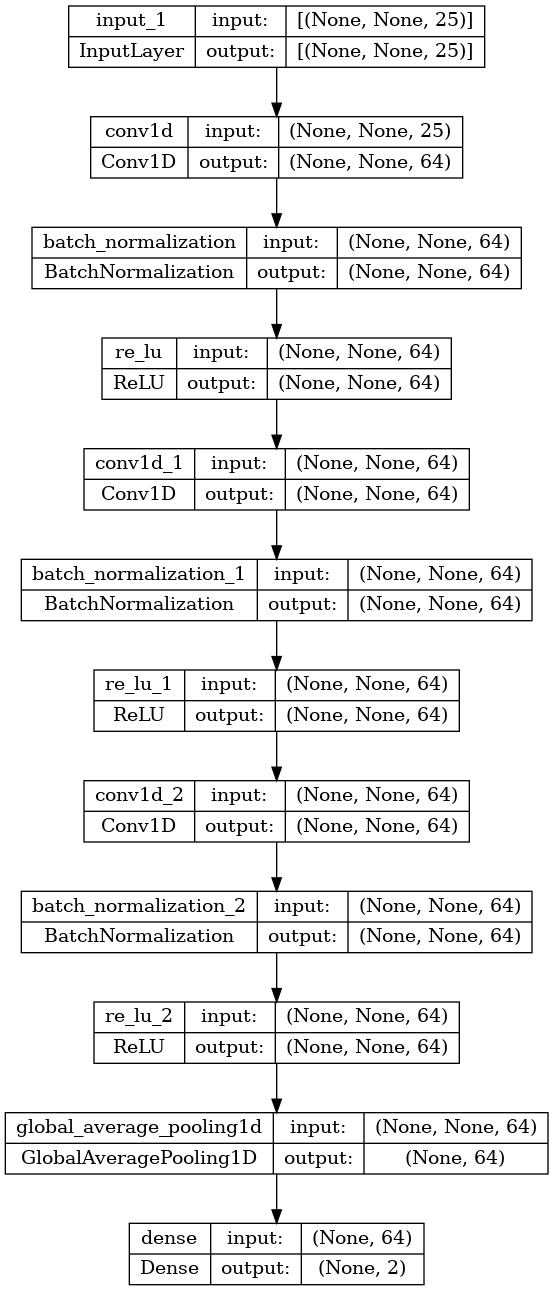

In [16]:
import tensorflow.keras as keras
columns=25
batches=len(Train_Batches)
num_classes=len(np.unique(unieque_names['contains_search_string']))

def make_model(input_shape):
    input_layer = keras.layers.Input([None,columns])

    conv1 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(input_layer)
    conv1 = keras.layers.BatchNormalization()(conv1)
    conv1 = keras.layers.ReLU()(conv1)

    conv2 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(conv1)
    conv2 = keras.layers.BatchNormalization()(conv2)
    conv2 = keras.layers.ReLU()(conv2)

    conv3 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(conv2)
    conv3 = keras.layers.BatchNormalization()(conv3)
    conv3 = keras.layers.ReLU()(conv3)

    gap = keras.layers.GlobalAveragePooling1D()(conv3)

    output_layer = keras.layers.Dense(num_classes, activation="softmax")(gap)

    return keras.models.Model(inputs=input_layer, outputs=output_layer)


model = make_model(input_shape=[25,1])
keras.utils.plot_model(model, show_shapes=True)

In [17]:
epochs = 500
batch_size = 32

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"],
)

1D Keras model for feature extraction from timeseries data. Might work well on the clasification algorithm which currently is not doing too well.

## Training the Neural network
Train the autoencoder on 1 batch of data at a time.
This is necceray for 2 reasons.
1. The data has variable lenghts, this cant be stored in a numpy array.
2. If you try to keep all values in memory at once, the RAM overflows and the kernel dies. This way that never happens

In [18]:
y=unieque_names['contains_search_string']
print(y)

0       False
1       False
2       False
3       False
4       False
        ...  
1114    False
1115    False
1116    False
1117    False
1118    False
Name: contains_search_string, Length: 1119, dtype: bool


In [19]:
y_train=unieque_names[unieque_names[0].isin(Train_Batches)]['contains_search_string'].astype(int)
y_test=unieque_names[unieque_names[0].isin(Test_Batches)]['contains_search_string'].astype(int)

print(y_train)

0       0
1       0
2       0
4       0
5       0
       ..
1111    0
1114    0
1115    0
1116    0
1118    0
Name: contains_search_string, Length: 895, dtype: int64


In [20]:
i=0 #itteration counter
X=[]
for row in Train_Batches:
    
    X_batch=Train_Grouped.get_group(row)
    X_batch=X_batch.drop(['5IAL_3_301.BatchName'],axis=1)
    X_batch=X_batch.values.tolist()

    X.append(X_batch)
    
    i=i+1
    # Show only the tenth itteration to avoid clutter, but keep an eye on progress
    if (i % 10)==9:
        progress='{} out of {} batches used for training'.format(i+1,batches)
        print(progress)

10 out of 895 batches used for training
20 out of 895 batches used for training
30 out of 895 batches used for training
40 out of 895 batches used for training
50 out of 895 batches used for training
60 out of 895 batches used for training
70 out of 895 batches used for training
80 out of 895 batches used for training
90 out of 895 batches used for training
100 out of 895 batches used for training
110 out of 895 batches used for training
120 out of 895 batches used for training
130 out of 895 batches used for training
140 out of 895 batches used for training
150 out of 895 batches used for training
160 out of 895 batches used for training
170 out of 895 batches used for training
180 out of 895 batches used for training
190 out of 895 batches used for training
200 out of 895 batches used for training
210 out of 895 batches used for training
220 out of 895 batches used for training
230 out of 895 batches used for training
240 out of 895 batches used for training
250 out of 895 batches us

In [21]:
# import tensorflow as tf

# dataset = tf.ragged.constant(X)

In [22]:
# history = model.fit(
#     dataset,
#     y_train,
#     epochs=50,
#     callbacks=[
#         keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, mode="min")
#     ],
# )


In [23]:
i=0 #itteration counter
for row in Train_Batches:
    
    #Get 1 batch, make the data fit in the model
    X_batch=Train_Grouped.get_group(row)
    X_batch=X_batch.drop(['5IAL_3_301.BatchName'],axis=1)
    X_batch=np.expand_dims(X_batch,axis=0)
    
    y_batch=unieque_names['contains_search_string'][(unieque_names[0]==row)]
    
    #fit the model with the fetched batch
    history = model.fit(
        X_batch,
        y_batch,
        epochs=50,
        verbose=0,
        callbacks=[
            keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, mode="min")
        ],
    )
    
    
    i=i+1
    # Show only the tenth itteration to avoid clutter, but keep an eye on progress
    if (i % 10)==9:
        progress='{} out of {} batches used for training'.format(i+1,batches)
        print(progress)

10 out of 895 batches used for training
20 out of 895 batches used for training
30 out of 895 batches used for training
40 out of 895 batches used for training
50 out of 895 batches used for training
60 out of 895 batches used for training
70 out of 895 batches used for training
80 out of 895 batches used for training
90 out of 895 batches used for training
100 out of 895 batches used for training
110 out of 895 batches used for training
120 out of 895 batches used for training
130 out of 895 batches used for training
140 out of 895 batches used for training
150 out of 895 batches used for training
160 out of 895 batches used for training
170 out of 895 batches used for training
180 out of 895 batches used for training
190 out of 895 batches used for training
200 out of 895 batches used for training
210 out of 895 batches used for training
220 out of 895 batches used for training
230 out of 895 batches used for training
240 out of 895 batches used for training
250 out of 895 batches us

In [24]:
print(data_norm.columns)

Index(['5IAL_3_TT301.50', '5IAL_3_QIT301.52', '5IAL_3_PIT 301.55',
       '5IAL_3_QIT301.57', '5IAL_3_PIT301.60', '5IAL_3_FIT301.61MF',
       '5IAL_3_FIT301.61VF', '5IAL_3_FIT301.61D', '5IAL_3_PIT301.63',
       '5IAL_3_P301.70', '5IAL_3_R301.71', '5IAL_3_P301.72',
       '5IAL_3_XPV301.53', '5IAL_3_XPV301.54', '5IAL_3_XPV301.63',
       '5IAL_3_LSL301.51', '5IAL_3_LSL301.53', '5IAL_3_GSC301.44',
       '5IAL_3_GSO301.44', '5IAL_3_LSL301.68', '5IAL_3_LSLL301.69',
       '5IAL_3_301.OCCUPIED', '5IAL_3_LIT301.54', '5IAL_3_XPV301.13',
       '5IAL_3_WY301.54', '5IAL_3_301.BatchName'],
      dtype='object')


# Get a random batch from the train set and display it here
everytime you run this cel it gets a random batch, be sure to run it a couple of times

In [25]:
#Get random batch
Random_Batch=Train_Grouped.get_group(random.sample(Train_Batches,1)[0])
Random_Batch=Random_Batch.drop(['5IAL_3_301.BatchName'],axis=1)
Random_Batch=np.expand_dims(Random_Batch,axis=0)

# Fit the batch using the model
Random_Batch_Pred= model.predict(Random_Batch)

t=Random_Batch_Pred>0.5
print(t)
print([i for i, x in enumerate(t.tolist()) if x])

1/1 [==============================] - 0s 159ms/step
[[ True False]]
[0]


## Calculate

In [26]:
# Initalise empy lists
pred_array_test=[]
y_array_test=[]

#len(Test_Batches)
for i in range(len(Test_Batches)):
    
    # Get i-th test batch name
    batch_name_loop=Test_Batches[i]
    Random_Batch=Test_Grouped.get_group(batch_name_loop)
    Random_Batch=Random_Batch.drop(['5IAL_3_301.BatchName'],axis=1)
    Random_Batch=np.expand_dims(Random_Batch,axis=0)

    
    # Fit the batch on the trained model 
    Random_Batch_Pred= model.predict(Random_Batch,verbose=0)
    
    t=Random_Batch_Pred>0.5
    pred=[i for i, x in enumerate(t.tolist()) if x]
    
    y_batch=unieque_names['contains_search_string'][(unieque_names[0]==batch_name_loop)]
    
    pred_array_test.append(pred[0])
    y_array_test.append(int(y_batch))
    
print('Done fitting')



Done fitting


Test peformance
[[222   0]
 [  2   0]]


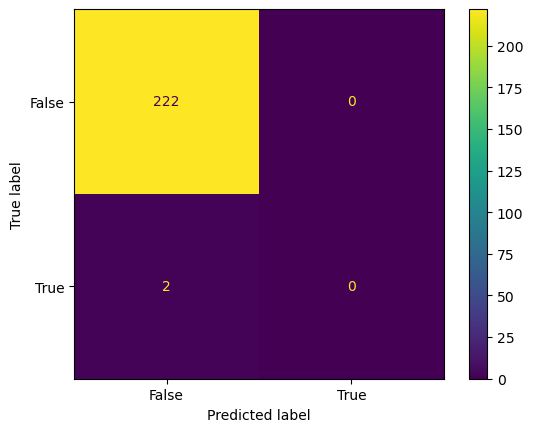

In [27]:
print('Test peformance')
cf=confusion_matrix(y_array_test,pred_array_test)

print(cf)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cf, display_labels = [False, True])

cm_display.plot()
plt.show()

## Maak predictie van alle data, dus test+Train

In [28]:
pred_array_train=[]
y_array_train=[]


for row in Train_Batches:
    
    pd_data=(data['5IAL_3_301.BatchName']==row)
    batch_date=(data['Date'][pd_data[pd_data].index[0]])

    
    Random_Batch=All_Grouped.get_group(row)
    Random_Batch=Random_Batch.drop(['5IAL_3_301.BatchName'],axis=1)
    Random_Batch=np.expand_dims(Random_Batch,axis=0)
    
    Random_Batch_Pred=model.predict(Random_Batch, verbose=0)

    t=Random_Batch_Pred>0.5
    pred=[i for i, x in enumerate(t.tolist()) if x]
    
    y_batch=unieque_names['contains_search_string'][(unieque_names[0]==row)]
    
    pred_array_train.append(pred[0])
    y_array_train.append(int(y_batch))
    
print('fit on traindata done')

fit on traindata done


train peformance
[[867   0]
 [ 28   0]]


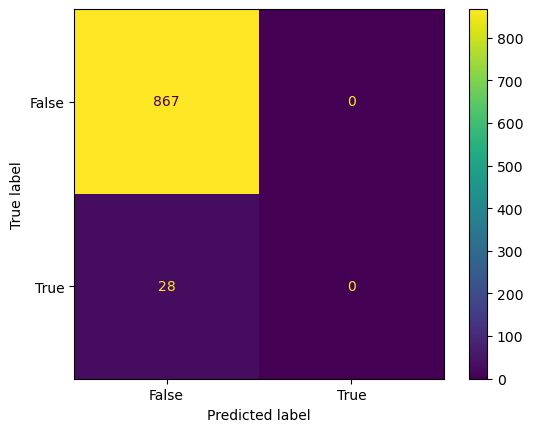

In [29]:
print('train peformance')
cf=confusion_matrix(y_array_train,pred_array_train)

print(cf)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cf, display_labels = [False, True])

cm_display.plot()
plt.show()

In [30]:
pred_array_all = pred_array_train + pred_array_test
y_array_all = y_array_train+ y_array_test

All peformance
[[1089    0]
 [  30    0]]


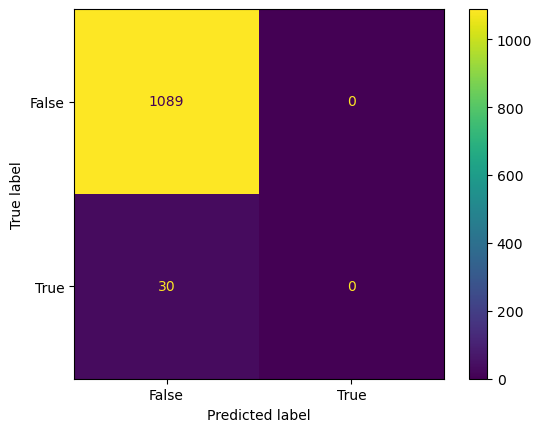

In [31]:
print('All peformance')
cf=confusion_matrix(y_array_all,pred_array_all)

print(cf)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cf, display_labels = [False, True])

cm_display.plot()
plt.show()